In [2]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import LabelEncoder


In [4]:
# -----------------------
# Create the dataset
# -----------------------
data = {
    "name": ["Batman", "Robin", "Alfred", "Penguin", "Catwoman", "Joker",
             "Batgirl", "Riddler", "Your date"],
    "mask":   ["y","y","n","n","y","n","y","y","n"],
    "cape":   ["y","y","n","n","n","n","y","n","y"],
    "tie":    ["n","n","y","y","n","n","n","n","y"],
    "ears":   ["y","n","n","n","y","n","y","n","y"],
    "smokes": ["n","n","n","y","n","n","n","n","y"],
    "height": [180,176,185,140,170,179,165,182,181],
    "class":  ["good","good","good","evil","evil","evil",None,None,None]
}

df = pd.DataFrame(data)
df


,name,mask,cape,tie,ears,smokes,height,class
0,Batman,y,y,n,y,n,180,good
1,Robin,y,y,n,n,n,176,good
2,Alfred,n,n,y,n,n,185,good
3,Penguin,n,n,y,n,y,140,evil
4,Catwoman,y,n,n,y,n,170,evil
5,Joker,n,n,n,n,n,179,evil
6,Batgirl,y,y,n,y,n,165,None
7,Riddler,y,n,n,n,n,182,None
8,Your date,n,y,y,y,y,181,None


In [5]:
# Encode y/n → 1/0
binary_cols = ["mask", "cape", "tie", "ears", "smokes"]
for col in binary_cols:
    df[col] = df[col].map({"y": 1, "n": 0})


In [6]:
label_encoder = LabelEncoder()
train_df = df.iloc[:6].copy()
train_df["class"] = label_encoder.fit_transform(train_df["class"])


In [7]:
X_train = train_df.drop(columns=["name", "class"])
y_train = train_df["class"]

X_test = df.iloc[6:].drop(columns=["name", "class"])


In [8]:
model = DecisionTreeClassifier(
    criterion="entropy",   # information gain (ID3-like)
    random_state=42
)

model.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', random_state=42)

In [9]:
y_pred = model.predict(X_test)
predicted_labels = label_encoder.inverse_transform(y_pred)


In [10]:
results = df.iloc[6:][["name"]].copy()
results["predicted_class"] = predicted_labels
print(results)


        name predicted_class
6    Batgirl            good
7    Riddler            evil
8  Your date            good


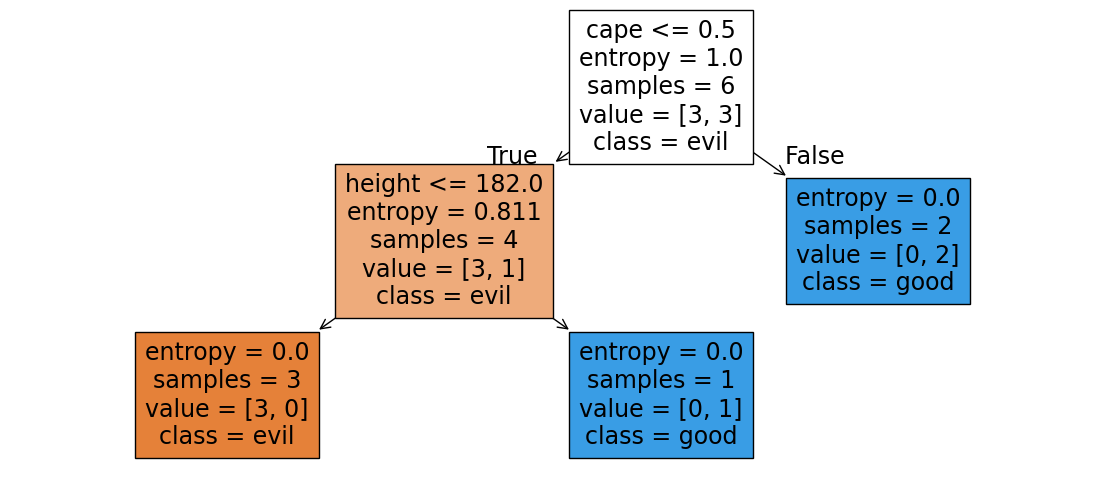

In [11]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

plt.figure(figsize=(14,6))
plot_tree(
    model,
    feature_names=X_train.columns,
    class_names=label_encoder.classes_,
    filled=True
)
plt.show()
